# SVD and time series 


The following function generates an $m \times n$ matrix that represents the evolution of $n$ quantities over the course of $m$ days, e.g. stocks, temperatures. 

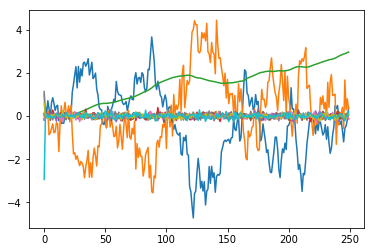

In [6]:
import numpy as np 

def generate_data(m, n):
    T = np.zeros((m,m))
    T[0,0] = 1.001
    T[1,0] = -1.001
    T[2,0] = .01
    T[2,2] = 1.01

    F = 0.1*np.ones(m)
    F[0] = 0.5
    F[1] = 0.5
    F[2] = 0.0

    np.random.seed(42)    

    Xt = np.random.uniform(size=(m,n))
    Xt[:,0] = np.random.normal(size=m)
    Xt[0,0] = .1
    Xt[1,0] = 1
    Xt[2] = .01
    
    for i in range(1,n):
        # this builds up the time correlations:
        Xt[:,i] = np.dot(T,Xt[:,i-1]) + F*np.random.normal(size=m) 
    
    return Xt.T # transpose so that rows represent time 

import matplotlib.pyplot as plt 
%matplotlib inline 

X = generate_data(10,250) # 10 quantities tracked over 250 days
_ = plt.plot(X)

### Problem

Plot the time series for the first two quantities only. 

### Solution 

In [1]:
# your code here 

It is clear that if one goes up, the other generally goes down, but is this a real correlation or did it just arise by chance? (These are "noisy" trajectories after all.)

### Problem 

Compute the norm of `X[:,0] + X[:,0]` to see that one trajectory is not just the negative of the other.

### Solution 



In [3]:
print 'norm of sum of first two trajs: '
print None # your code here

norm of sum of first two trajs: 
None


### Problem 

Fill in the following code that performs a SVD of the data and computes `X_approx`, which projects the data onto the first $k$ principal eigenvectors. What is the norm of `X_approx[:,0] + X_approx[:,0]`? Interpret your result. 

### Solution 

NameError: global name 'X_approx' is not defined

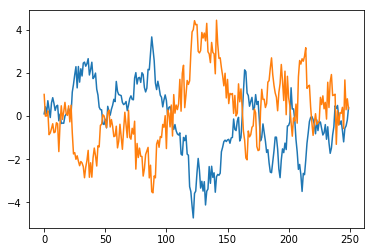

In [7]:
import scipy.linalg 

def create_Sigma(U,s,Vt): 
    m = len(U)
    n = len(Vt)
    Sigma = np.zeros((m, n))
    for i in range(min(m, n)):
        Sigma[i, i] = s[i]
    return Sigma
    
def compare_exact_to_approximation(trajectories, s_cutoff):           
    # SVD: compute U, S, Vt 
    # your code here 
    
    # project data onto s_cutoff principal eigenvectors
    # your code here 
    
    # compare exact and approximated trajectories
    plt.plot(X[:,trajectories])
    plt.plot(X_approx[:,trajectories])
    
    return X_approx

X_approx = compare_exact_to_approximation(trajectories=[0,1], s_cutoff=1)

print 'norm of sum of first two trajs: '
print np.linalg.norm(X_approx[:,0] + X_approx[:,1])

Trajectories 0 and 1 represent components of data vectors. These components don't shift very much when the data is projected onto the vector subspace spanned by the first eigenvector. (This is what `compare_exact_to_approximation` does when `s_cutoff=1`.)  For these components, the first-order approximation is good. 

Now look at trajectory 2: 

NameError: global name 'X_approx' is not defined

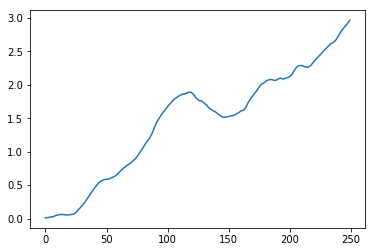

In [8]:
_ = compare_exact_to_approximation(trajectories=2, s_cutoff=1)

Trajectory 2 represents a component that does shift alot when data are projected onto the vector subspace spanned by the first principal eigenvector. In other words the approximation is poor for such data. 

### Problem 

Remedy the poor approximation of trajectory 2 by projecting the data onto the vector subspace spanned by the first two principal eigenvectors. 

### Solution 

In [9]:
# your code here